In [2]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


In [4]:
import kagglehub
path = kagglehub.dataset_download("kapilesha/brainmetshare")
print(path)

/home/abigalel/.cache/kagglehub/datasets/kapilesha/brainmetshare/versions/1


In [ ]:
pip install torch torchvision numpy nibabel imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 51.3 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 74.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 63.4 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 87.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 106.9 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 19.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 61.9 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 131.9 MB/s  0:00:010:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 106.4 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 121.1 MB/s  0:00:020:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 10

In [9]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 MB 61.5 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 84.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 95.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 71.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 98.6 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19/19 [tensorflow]9 [tensorflow]]data-server]


Train patients: 105
Test  patients: 51
Using TRAIN: Mets_001
Using TEST : Mets_001
Slice: z075


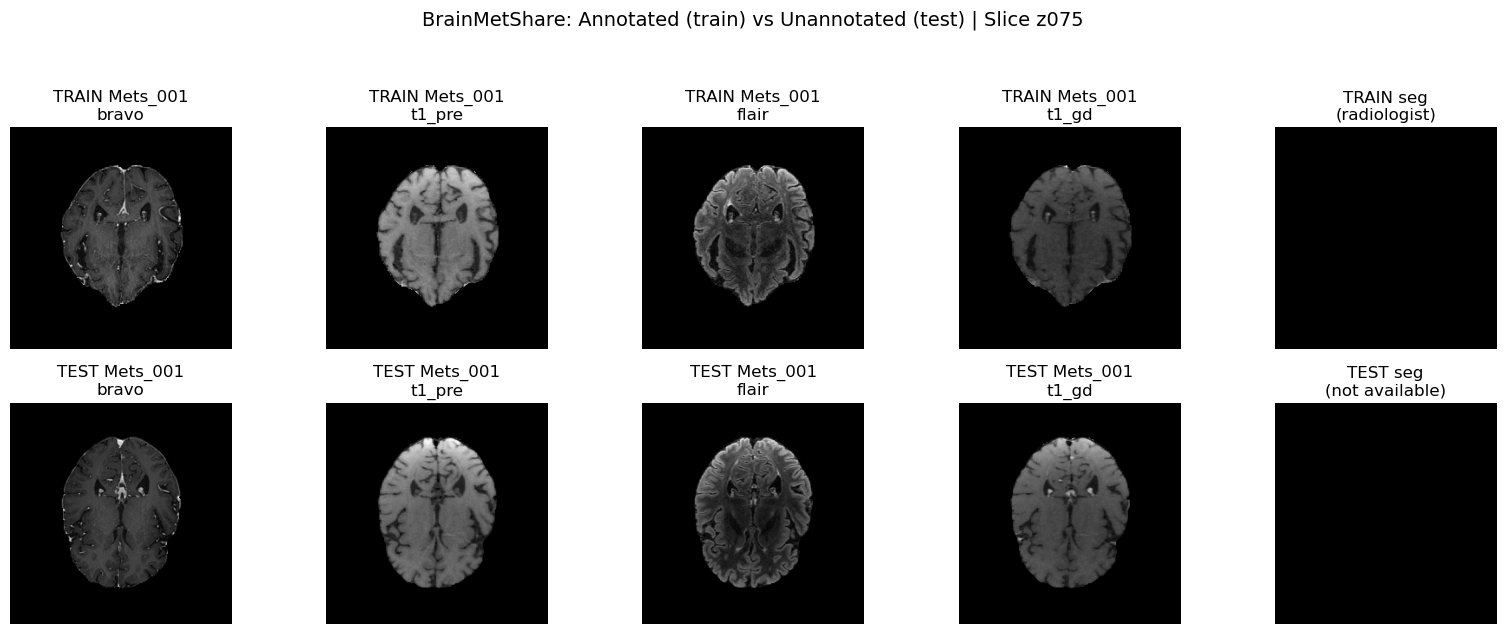

In [14]:
import os, glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

BASE = "/home/abigalel/.cache/kagglehub/datasets/kapilesha/brainmetshare/versions/1/BRAINMETASTASIS"
slice_idx = 75  
z = f"z{slice_idx:03d}"

modalities = ["bravo", "t1_pre", "flair", "t1_gd"]

def read_png(path):
    return np.array(Image.open(path))

# 找 train / test 病人
train_patients = sorted(glob.glob(os.path.join(BASE, "train", "Mets_*")))
test_patients  = sorted(glob.glob(os.path.join(BASE, "test",  "Mets_*")))

print("Train patients:", len(train_patients))
print("Test  patients:", len(test_patients))

train_patient = train_patients[0]
test_patient  = test_patients[0]
train_id = os.path.basename(train_patient)
test_id  = os.path.basename(test_patient)

print("Using TRAIN:", train_id)
print("Using TEST :", test_id)
print("Slice:", z)

train_imgs = {m: read_png(os.path.join(train_patient, m, f"{m}_{z}.png")) for m in modalities}
train_seg  = read_png(os.path.join(train_patient, "seg", f"seg_{z}.png"))
test_imgs = {m: read_png(os.path.join(test_patient, m, f"{m}_{z}.png")) for m in modalities}

fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i, m in enumerate(modalities):
    axes[0, i].imshow(train_imgs[m], cmap="gray")
    axes[0, i].set_title(f"TRAIN {train_id}\n{m}")
axes[0, 4].imshow(train_seg, cmap="gray")
axes[0, 4].set_title("TRAIN seg\n(radiologist)")

for i, m in enumerate(modalities):
    axes[1, i].imshow(test_imgs[m], cmap="gray")
    axes[1, i].set_title(f"TEST {test_id}\n{m}")
axes[1, 4].imshow(np.zeros_like(train_seg), cmap="gray")
axes[1, 4].set_title("TEST seg\n(not available)")

for ax in axes.ravel():
    ax.axis("off")

plt.suptitle(f"BrainMetShare: Annotated (train) vs Unannotated (test) | Slice {z}", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


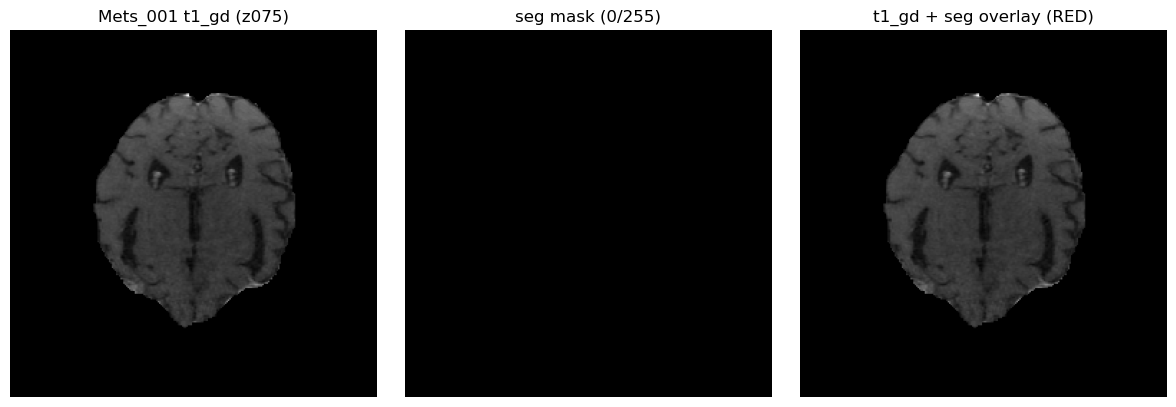

Labeled pixels in this slice: 0


In [15]:
import os, glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

BASE = "/home/abigalel/.cache/kagglehub/datasets/kapilesha/brainmetshare/versions/1/BRAINMETASTASIS"
slice_idx = 75
z = f"z{slice_idx:03d}"

def read_png(path):
    return np.array(Image.open(path))

# pick one train patient
train_patient = sorted(glob.glob(os.path.join(BASE, "train", "Mets_*")))[0]
train_id = os.path.basename(train_patient)

t1_gd = read_png(os.path.join(train_patient, "t1_gd", f"t1_gd_{z}.png")).astype(np.float32)
seg   = read_png(os.path.join(train_patient, "seg",   f"seg_{z}.png"))

mask = seg > 0  # True where radiologist labeled

# normalize image for display
img = t1_gd.copy()
img = (img - img.min()) / (img.max() - img.min() + 1e-6)

# create RGB overlay
rgb = np.stack([img, img, img], axis=-1)
rgb[mask, 0] = 1.0  # red channel
rgb[mask, 1] = 0.0
rgb[mask, 2] = 0.0

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title(f"{train_id} t1_gd ({z})")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(seg, cmap="gray")
plt.title("seg mask (0/255)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(rgb)
plt.title("t1_gd + seg overlay (RED)")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Labeled pixels in this slice:", int(mask.sum()))


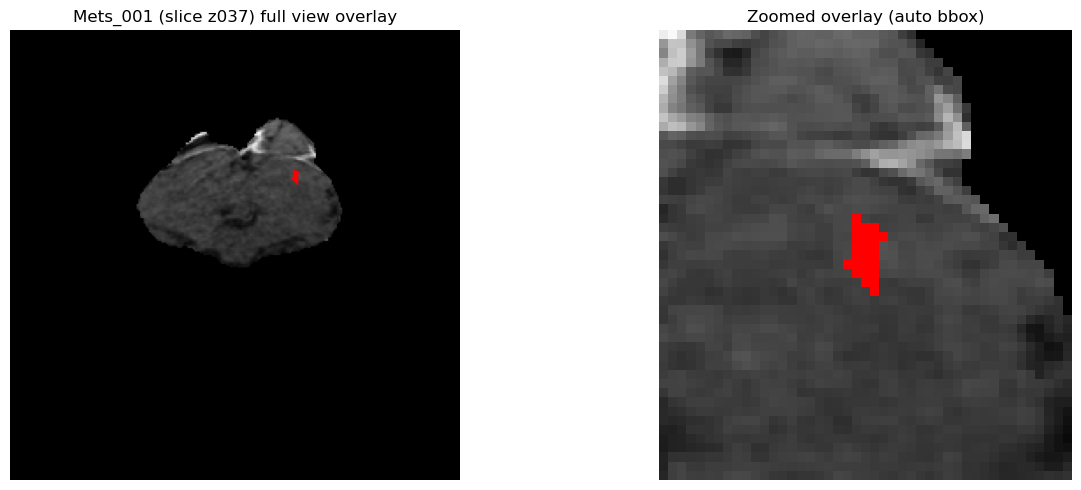

Picked slice: z037 | labeled pixels: 24 | bbox: x[140:184], y[59:107]


In [16]:
import os, glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

BASE = "/home/abigalel/.cache/kagglehub/datasets/kapilesha/brainmetshare/versions/1/BRAINMETASTASIS"

def read_png(path):
    return np.array(Image.open(path))

train_patient = sorted(glob.glob(os.path.join(BASE, "train", "Mets_*")))[0]
train_id = os.path.basename(train_patient)

found = None
for i in range(1, 151):
    z = f"z{i:03d}"
    seg_path = os.path.join(train_patient, "seg", f"seg_{z}.png")
    seg = read_png(seg_path)
    if (seg > 0).any():
        found = (i, z, seg)
        break

if found is None:
    raise RuntimeError("This patient seems to have no positive seg pixels in 1..150 (unexpected).")

i, z, seg = found
t1_gd = read_png(os.path.join(train_patient, "t1_gd", f"t1_gd_{z}.png")).astype(np.float32)
mask = seg > 0

# normalize
img = t1_gd.copy()
img = (img - img.min()) / (img.max() - img.min() + 1e-6)

# bounding box + padding
ys, xs = np.where(mask)
y0, y1 = ys.min(), ys.max()
x0, x1 = xs.min(), xs.max()
pad = 20
y0 = max(0, y0 - pad); y1 = min(img.shape[0]-1, y1 + pad)
x0 = max(0, x0 - pad); x1 = min(img.shape[1]-1, x1 + pad)

# overlay full image
rgb = np.stack([img, img, img], axis=-1)
rgb[mask, 0] = 1.0; rgb[mask, 1] = 0.0; rgb[mask, 2] = 0.0

# zoom crop
img_crop = img[y0:y1+1, x0:x1+1]
mask_crop = mask[y0:y1+1, x0:x1+1]
rgb_crop = np.stack([img_crop, img_crop, img_crop], axis=-1)
rgb_crop[mask_crop, 0] = 1.0; rgb_crop[mask_crop, 1] = 0.0; rgb_crop[mask_crop, 2] = 0.0

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title(f"{train_id} (slice {z}) full view overlay")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb_crop)
plt.title("Zoomed overlay (auto bbox)")
plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Picked slice: {z} | labeled pixels: {int(mask.sum())} | bbox: x[{x0}:{x1}], y[{y0}:{y1}]")


In [17]:
import torch
import torch.nn as nn

class BasicSegCNN(nn.Module):
    """
    Input:  (B, 4, H, W)
    Output: (B, 1, H, W) logits
    """
    def __init__(self, in_ch=4, base=16):
        super().__init__()

        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(in_ch, base, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(base, base, 3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.pool1 = nn.MaxPool2d(2)  # H/2, W/2

        self.enc2 = nn.Sequential(
            nn.Conv2d(base, base*2, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(base*2, base*2, 3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.pool2 = nn.MaxPool2d(2)  # H/4, W/4

        # Bottleneck
        self.mid = nn.Sequential(
            nn.Conv2d(base*2, base*4, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(base*4, base*4, 3, padding=1),
            nn.ReLU(inplace=True),
        )

        # Decoder
        self.up2 = nn.ConvTranspose2d(base*4, base*2, kernel_size=2, stride=2)  # H/2
        self.dec2 = nn.Sequential(
            nn.Conv2d(base*2, base*2, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(base*2, base, 3, padding=1),
            nn.ReLU(inplace=True),
        )

        self.up1 = nn.ConvTranspose2d(base, base, kernel_size=2, stride=2)  # H
        self.dec1 = nn.Sequential(
            nn.Conv2d(base, base, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(base, base, 3, padding=1),
            nn.ReLU(inplace=True),
        )

        # Output logits
        self.out = nn.Conv2d(base, 1, kernel_size=1)

    def forward(self, x):
        x = self.enc1(x)
        x = self.pool1(x)
        x = self.enc2(x)
        x = self.pool2(x)

        x = self.mid(x)

        x = self.up2(x)
        x = self.dec2(x)
        x = self.up1(x)
        x = self.dec1(x)

        return self.out(x)


In [18]:
model = BasicSegCNN()
x = torch.randn(2, 4, 256, 256)
y = model(x)
print(y.shape)  


torch.Size([2, 1, 256, 256])
